# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [43]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# Method 1
# your answer here
employee.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [6]:
employee.pivot_table(values = 'Salary', index= ['Department'], aggfunc = ['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [9]:
employee.pivot_table(index= ['Department', 'Title'], aggfunc ={'Salary' : 'mean'})

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
employee.pivot_table(index= ['Department', 'Title'], aggfunc = ['mean'])

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [12]:
employee.pivot_table(index= ['Department','Title'], aggfunc={'Salary' : ['mean', np.size]})

Salary     
                       mean size
Department Title                
HR         VP          70.0  1.0
           analyst     32.5  2.0
IT         VP          70.0  1.0
           analyst     32.5  2.0
           associate   60.0  1.0
Sales      associate   55.0  2.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [13]:
employee.pivot_table(index= ['Department','Title'], aggfunc={'Salary' : [np.median, min, max, np.std]})

#There's Nan's for instance on VP of the HR Department because we only have one value, so no standard deviation

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [16]:
employee.pivot_table(index= ['Department','Title'], aggfunc={'Salary' : [np.median, min, max, np.std]}).fillna(0)

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0  0.000000
Sales      associate   55.0   55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [17]:
employee.pivot_table(values = ['Salary', 'Name'], index= ['Department'], aggfunc = {'Salary':'sum', 'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [18]:
employee.pivot_table(values = ['Salary', 'Years'], index= ['Department', 'Title'], aggfunc = {'Salary':'mean', 'Years': 'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [23]:
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [28]:
#Data types
print(fitbit.dtypes)

#Descripition of the data
fitbit.describe()

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [ ]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [29]:
fitbit.corr()

#fitbit['Minutes Very Active'].corr(fitbit['Steps'])

# 0.571452 is the value of the correlation between Minutes Very Active and Steps. There's other stronger correlations

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

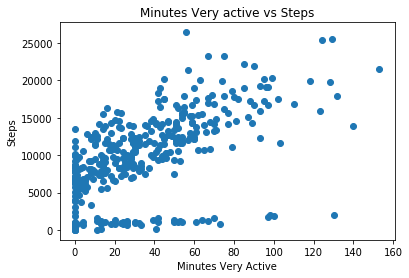

In [35]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.ylabel('Steps')
plt.xlabel('Minutes Very Active')
plt.title('Minutes Very active vs Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
#The numeric value of 0.57 for this correlation makes visually sense once there's a trend in the plot but also a lot of points that dont behave like that. Still, and for sure, the more Minutes Very Active, the more Steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [32]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

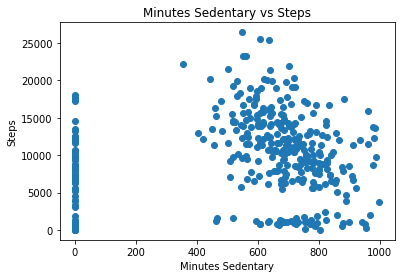

In [36]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.ylabel('Steps')
plt.xlabel('Minutes Sedentary')
plt.title('Minutes Sedentary vs Steps')
plt.show()


# We can visualize why we only get such a low value on the correlation between the two variables. We can hardly say there's a correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [34]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(*args, **kw)>

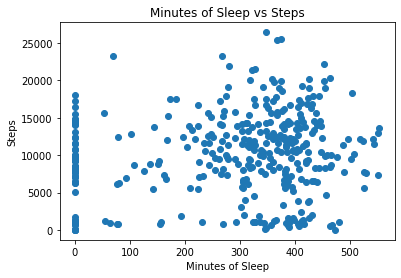

In [37]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.ylabel('Steps')
plt.xlabel('Minutes of Sleep')
plt.title('Minutes of Sleep vs Steps')
plt.show

# The same as the last question. Weak positive correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [39]:
column= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

cor_fit =column.corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [40]:
cor_fit['Steps'].sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [41]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

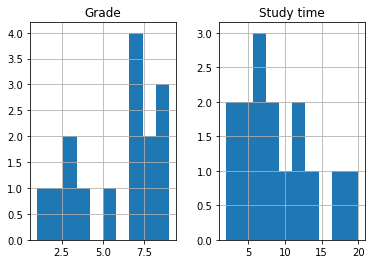

In [42]:
time_grades.hist()
plt.show()

#time_grades.plot(kind='hist') - one on top of the other in the same graph

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [52]:
#Pearson

pearson = time_grades.corr()
print(pearson)

# Spearman

spearman = time_grades.corr(method = 'spearman')
print(spearman)

# There's a strong correlation. It seems like the more you study, the better grades you have. It is interesting to see they are so close

            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000
            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(*args, **kw)>

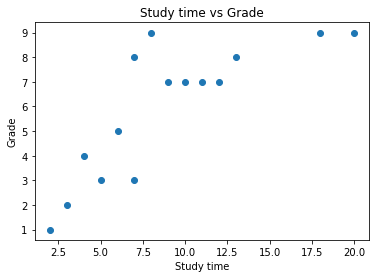

In [53]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.ylabel('Grade')
plt.xlabel('Study time')
plt.title('Study time vs Grade')
plt.show

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
"""
Pearson is a linear type of regression. It is not as different from the Spearman, but Spearman has the ability 
of taking non linear regressions too.
Because it behaved better, I would say this is a better fit in this case.
"""